In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
plt.style.use('dark_background')

In [2]:
def crear(gender):
    names=[]
    df=pd.read_csv(f'{gender}_names.csv').dropna()
    df.sort_values('frequency',ascending=False,inplace=True)
    for x in df.name:
        if(('Ç'in x)or("'"in x)):
            pass
        else:
            nombres=x.split(' ')
            for n in nombres:
                names.append(n)
                
    names=list(set(names))
    return names

In [21]:
female=crear('female')
male=crear('male')

In [22]:
nombres=female+male
del female,male

In [23]:
distinct=[]
for n in nombres:
    for char in n:
        if char not in distinct:
            distinct.append(char)

In [24]:
distinct=sorted(distinct)

In [25]:
char2ix={c:i for i,c in enumerate(distinct)}
ix2char={i:c for i,c in enumerate(distinct)}

In [26]:
random.seed(1)
random.shuffle(nombres)

In [27]:
x,y=np.unique([len(name) for name in nombres],return_counts=True)

<BarContainer object of 14 artists>

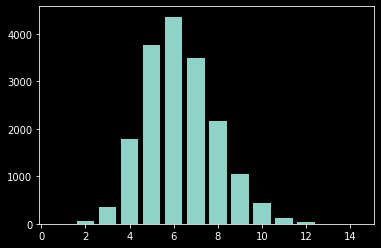

In [28]:
plt.bar(x,y)

In [29]:
nombres=list(set(nombres))

In [30]:
nombres = [name for name in nombres if len(name)>5]

<BarContainer object of 9 artists>

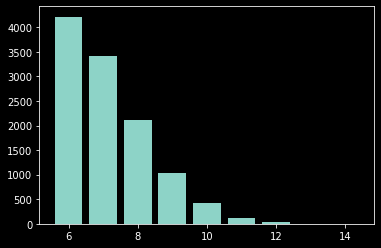

In [31]:
x,y=np.unique([len(name) for name in nombres],return_counts=True)
plt.bar(x,y)

In [32]:
def give_possible(index,length):
        possible=list(range(index-2,index+3))
        possible=list(np.maximum(possible,0))
        possible=list(np.minimum(possible,length-1))
        possible=list(set(possible))
        possible.remove(index)
        return sorted(possible)

In [33]:
X=[]
Y=[]
random.seed(0)
for name in nombres:
    ix1,ix2=random.sample(range(len(name)), 2)
    possible = lambda x: give_possible(x, len(name))
    for index in [ix1,ix2]:
        indices=possible(index)
        for ix in indices:
            x=np.zeros(27)
            x[char2ix[name[index]]]=1
            X.append(x)
            Y.append(char2ix[name[ix]])

In [34]:
X=np.array(X)
Y=np.array(Y)

In [35]:
X.shape

(71165, 27)

In [36]:
Y.shape

(71165,)

In [37]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2048)])

In [42]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential

In [39]:
Embedding = Dense(2, use_bias=False)
Decoder = Dense(27, activation='softmax')

In [56]:
model = Sequential([Input(shape=27),Embedding,Decoder])

In [57]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [58]:
model.fit(X,Y,batch_size=64, epochs=50, verbose=1)

Epoch 1/50
1112/1112 [==============================] - 1s 980us/step - loss: 2.7984 - accuracy: 0.1627
Epoch 2/50
1112/1112 [==============================] - 1s 960us/step - loss: 2.7983 - accuracy: 0.1635
Epoch 3/50
1112/1112 [==============================] - 1s 970us/step - loss: 2.7983 - accuracy: 0.1625
Epoch 4/50
1112/1112 [==============================] - 1s 966us/step - loss: 2.7983 - accuracy: 0.1629
Epoch 5/50
1112/1112 [==============================] - 1s 975us/step - loss: 2.7983 - accuracy: 0.1629
Epoch 6/50
1112/1112 [==============================] - 1s 981us/step - loss: 2.7983 - accuracy: 0.1633
Epoch 7/50
1112/1112 [==============================] - 1s 988us/step - loss: 2.7983 - accuracy: 0.1620
Epoch 8/50
1112/1112 [==============================] - 1s 988us/step - loss: 2.7983 - accuracy: 0.1626
Epoch 9/50
1112/1112 [==============================] - 1s 967us/step - loss: 2.7983 - accuracy: 0.1622
Epoch 10/50
1112/1112 [==============================] - 1s 975u

In [59]:
emb_matrix=Embedding.get_weights()[0]

In [60]:
emb_matrix[0]

array([-0.25855282, -0.39667952], dtype=float32)

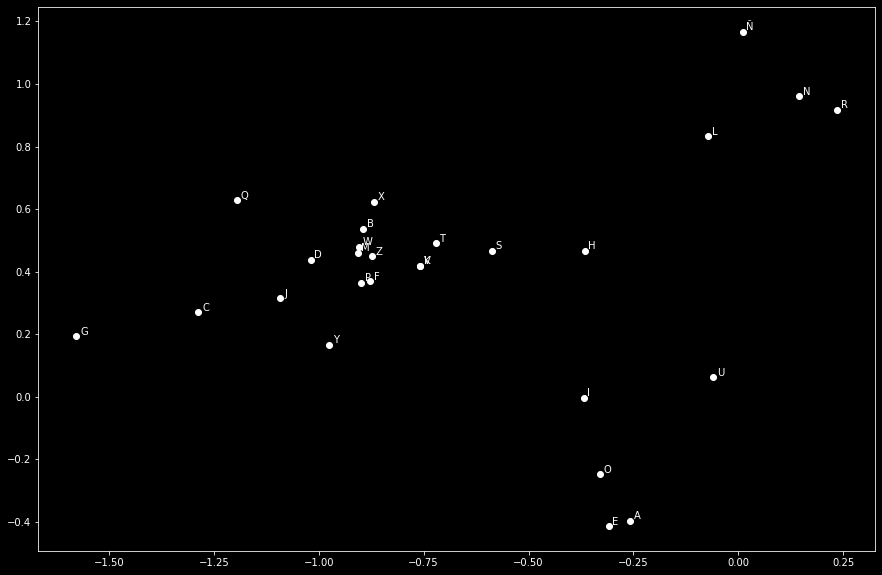

In [61]:
plt.figure(figsize=(15,10))
plt.scatter(*emb_matrix.T,c='white')
for i in range(27):
    x,y = emb_matrix[i]
    plt.text(x+9e-3,y+5e-3,distinct[i],color='white')